## uso y manejo de embedding utilizando la herramienta gensim

Para explicación de los códigos remitase al enlace:
https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [6]:
#crear mi propio word2vec embeddings
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
print(model.wv['sentence'])
# save model
model.save('My_model.bin')
# load model
new_model = Word2Vec.load('My_model.bin')
#The trained word vectors can also be stored/loaded from a format compatible with
#the original word2vec implementation via
#self.wv.save_word2vec_format
#gensim.models.keyedvectors.KeyedVectors.load_word2vec_format().

print(new_model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.498

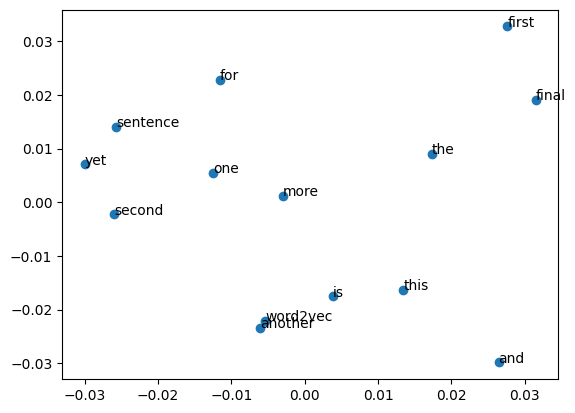

In [7]:
#graficar una proyección bidimensional de los embeddings de las palabras
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
# Replace model.wv.vocab with model.wv.key_to_index to get word vectors
X = model.wv[list(model.wv.key_to_index)] # Changed this line
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
# Replace model.wv.vocab with model.wv.key_to_index to get word list
words = list(model.wv.key_to_index) # Changed this line
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [2]:
#Gemsim tiene una api para descargar los embeddings. descargarque si quiere el archivo  para futuros usos.
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

result = wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

print(result)


[('queen', 0.7118193507194519)]


In [3]:
#wv.save('word2vec-google-news-300.bin')


In [4]:
# la otra opción descargargando el archivo y cargandolo en gensim
from gensim.models import KeyedVectors

filename = 'GoogleNews-vectors-negative300.bin'. #este es el nombre del archivo descargado
wv = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
# calculate: (king - man) + woman = ?
result = wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

SyntaxError: invalid syntax (<ipython-input-4-fd905b201812>, line 4)

In [ ]:
#Lo mismo con glove. solo que para usarlo "al estilo wor2vec" debemos cambiar el formato de glove

#con el siguiente codigo se cambia el formato de gove a word2vec, para darle el mismo manejo
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:
#Una vez convertido se hace el mismo manejo que con word2vec
from gensim.models import KeyedVectors
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

In [4]:
api.info()  # return dict with info about available models/datasets
# con ctrl-f busque la palabra num_records asi podrá ver los nombres de los datasets

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se